In [6]:
import coco_dataset
import pathlib
import common
import matplotlib.pyplot as plt
from torchvision import transforms
import torch

In [7]:
coco_dataset = coco_dataset.CocoKeypoints(
    root=str(pathlib.Path("coco") / "images" / "train2017"),
    annFile=str(
        pathlib.Path("coco")
        / "annotations"
        / "annotations"
        / "person_keypoints_train2017.json"
    ),
    transform=transforms.Resize([224, 224]),
    resize_keypoints_to=[224, 224],
)
i=0

loading annotations into memory...
Done (t=5.59s)
creating index...
index created!


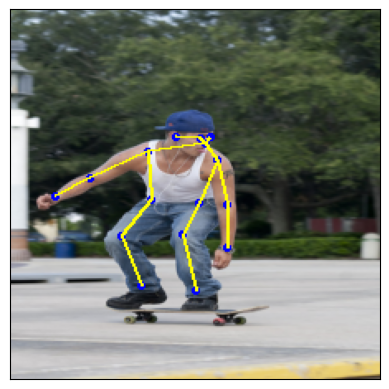

6


In [13]:
i+=1
sample = coco_dataset[i]
image, keypoints = sample

res = utils.draw_keypoints(
    transforms.functional.pil_to_tensor(image),
    torch.from_numpy(keypoints),
    visibility=[1, 2],
    connectivity=common.connect_skeleton,
    keypoint_color="blue",
    line_color="yellow",
    radius=2,
    width=2,
)
utils.show1(res)
plt.show()
print(i)